In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Adding settings for displays
plt.rcParams["figure.figsize"] = (10,8)
sns.set_style("whitegrid")
pd.set_option('display.float_format',lambda x : '%.3f'%x)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_columns',None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_rows',None)

In [342]:
df = pd.read_csv('/kaggle/input/titaniceda/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [343]:
df.shape

(891, 12)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
# Check the sum of Missing Values per column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [346]:
# Check the Percentage of Missing Values

df.isnull().sum() / len(df)*100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.865
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         77.104
Embarked       0.224
dtype: float64

In [347]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [348]:
# Check if the Dataset have any Duplicate

df.duplicated().value_counts()

False    891
dtype: int64

In [349]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [350]:
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [351]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# Listing all Categorical/object columns

In [352]:
object_col=df.loc[:, ((df.dtypes == object) & ((df.columns != 'Name') & (df.columns != 'Ticket')))].columns # removed name and ticket as they have more unique values
object_col

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [353]:
(df.loc[:, df.dtypes == object]).head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [354]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

Sex
----------------
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------
Cabin
----------------
NaN                687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
D                    3
F33                  3
E101                 3
F2                   3
B20                  2
E67                  2
C125                 2
E24                  2
B49                  2
B77                  2
D35                  2
C78                  2
C93                  2
C65                  2
B57 B59 B63 B66      2
B5                   2
E121                 2
B51 B53 B55          2
B18                  2
C124                 2
C126                 2
B35                  2
E44                  2
C92                  2
C68                  2
D20                  2
B22                  2
E25                  2
D36                  2
E8                   2
C83                  2
C2                   2
D17         

# check for special characters

In [355]:
(df.astype(str) == '?').any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [356]:
df['Name'].str.contains(r'[()]',na=False, regex=True).value_counts() # name column have special charecter ( , )

False    748
True     143
Name: Name, dtype: int64

In [357]:
df.loc[df['Name'].str.contains(r'[()]',na=False, regex=True)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000,0,0,248706,16.000,NaN,S


In [358]:
# df['Name'] = df['Name'].str.replace('\W', '', regex=True) # replace any special charecter

# df['Name'] = df['Name'].str.replace(r'[()]', '', regex=True) # replace only ( or )

In [359]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# **Univariate & Multivariate Analysis**

# Survived

In [360]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [361]:
df.Survived.isnull().sum()

0

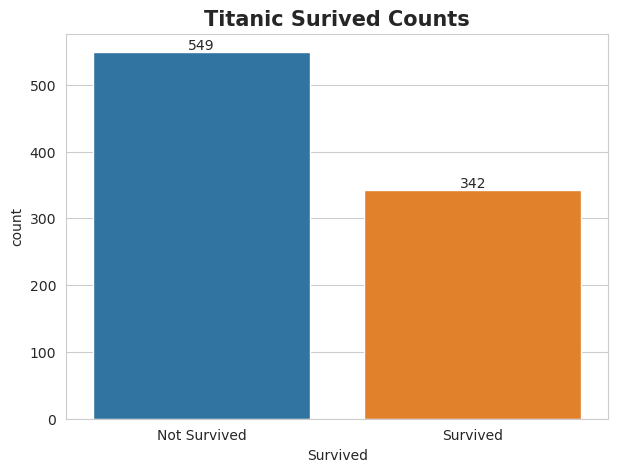

In [362]:
fig,ax = plt.subplots(figsize=(7,5))
sns.countplot(x='Survived',data=df)
ax.set_xticklabels(['Not Survived','Survived'])

ax.set_title('Titanic Surived Counts',fontsize=15, weight='bold')
for i in ax.containers:
    ax.bar_label(i,fmt="%.f")

**Percentage Survived**

In [363]:
survive_pct=df.Survived.value_counts()/df.Survived.count()*100
survive_pct

0   61.616
1   38.384
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Titanic Surived Pecentage')

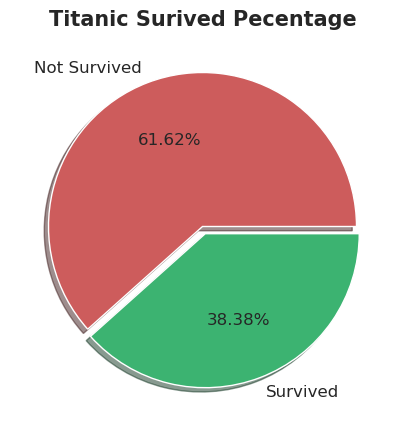

In [364]:
fig,ax = plt.subplots(figsize=(7,5))
ax.pie(x=survive_pct,
       labels=['Not Survived','Survived'],
       autopct='%.02f%%',
       colors=["indianred","mediumseagreen"],
       shadow=True,explode=[0,0.05],
       textprops=({'size': 'large'}))
                                                                                                                                            
ax.set_title('Titanic Surived Pecentage',fontsize=15, weight='bold')

**Conclusion**

**just over 1/3rd of passengers survived and close to 2/3 rd of passengers did not survived the Titanic incedent**

**More people died in the incident than survived**

# Sex

In [365]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [366]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

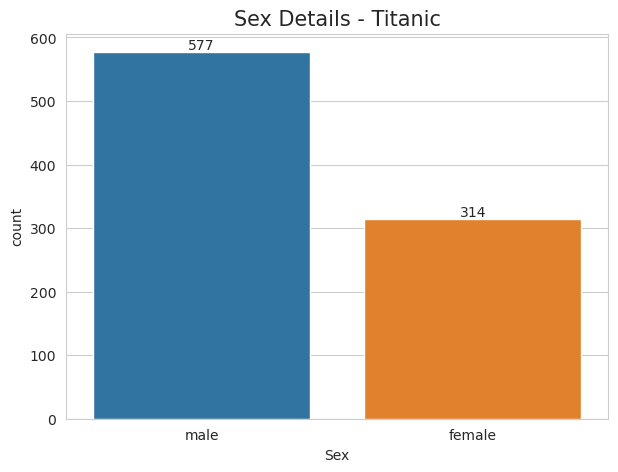

In [367]:
fig,ax = plt.subplots(figsize=(7,5))

sns.countplot(x="Sex",data=df)
ax.set_title('Sex Details - Titanic',fontsize=15)

for i in ax.containers:
    ax.bar_label(i,fmt="%.f")

In [368]:
sex_pct=df.Sex.value_counts()/df.Sex.count()*100
sex_pct

male     64.759
female   35.241
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Pecentage of Sex - Titanic')

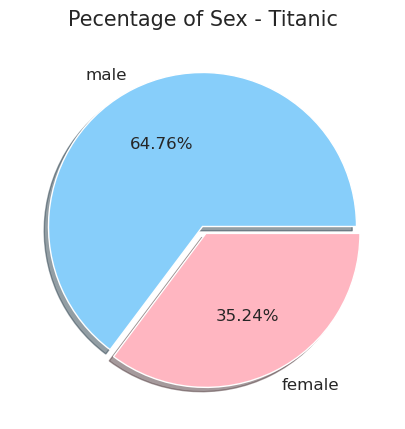

In [369]:
fig,ax = plt.subplots(figsize=(7,5))
ax.pie(x=sex_pct,
       labels=["male","female"],
       colors=["lightskyblue","lightpink"],
       autopct='%.2f%%',
       shadow=True,
       explode=[0,0.05],
      textprops=({'size': 'large'}))
ax.set_title('Pecentage of Sex - Titanic',fontsize=15)

**Sex in relation with Survival**

In [370]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [371]:
SurvivalBySex=(df.groupby("Survived")["Sex"].value_counts()/df.groupby("Survived")["Sex"].count())*100
SurvivalBySex

Survived  Sex   
0         male     85.246
          female   14.754
1         female   68.129
          male     31.871
Name: Sex, dtype: float64

In [372]:
SurvivalBySex=SurvivalBySex.reset_index(name='pct')
SurvivalBySex

,Survived,Sex,pct
0,0,male,85.246
1,0,female,14.754
2,1,female,68.129
3,1,male,31.871


In [373]:
SurvivalBySex.Survived=SurvivalBySex.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivalBySex

,Survived,Sex,pct
0,Not Survived,male,85.246
1,Not Survived,female,14.754
2,Surived,female,68.129
3,Surived,male,31.871


Text(0.5, 1.0, 'Survival Percentage by Sex')

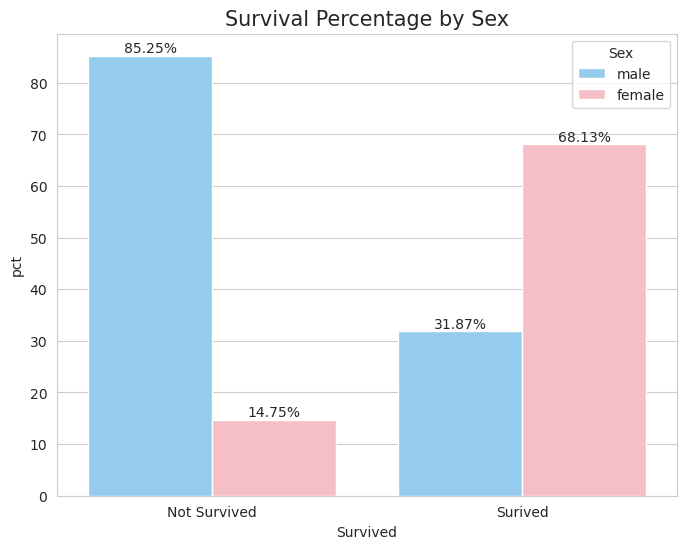

In [374]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Survived",y="pct",data=SurvivalBySex,hue="Sex",palette=["lightskyblue","lightpink"])

ax.set_xticklabels(SurvivalBySex.Survived.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Sex',fontsize=15)

**Conclusion**

There are more male passengers and staff on Titanic than female

Just over 1/3rd of all onboard titanic are female and just under 2/3rd of all onboard titanic are male

Around 68.13% of survived individuals are females where as only 31.87% of males survived.

Despite the females are outnumberd by 1 to 2 , they survived at a rate of 2 to 1

# Age

In [375]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [376]:
df.Age.value_counts().head()

24.000    30
22.000    27
18.000    26
19.000    25
28.000    25
Name: Age, dtype: int64

In [377]:
df.Age.describe()

count   714.000
mean     29.699
std      14.526
min       0.420
25%      20.125
50%      28.000
75%      38.000
max      80.000
Name: Age, dtype: float64

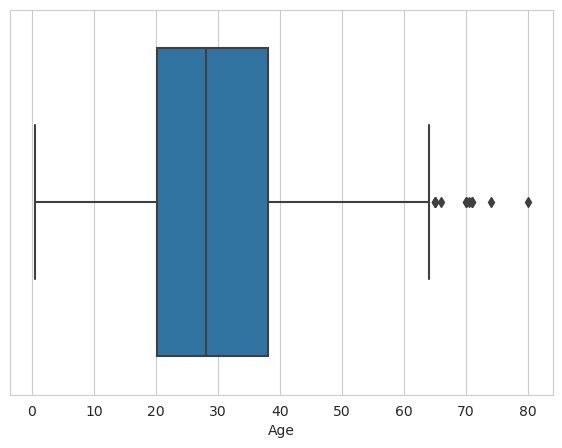

In [378]:
fig,ax = plt.subplots(figsize=(7,5))
sns.boxplot(x="Age",data=df);

Text(0.5, 1.0, 'Age KDE Plot')

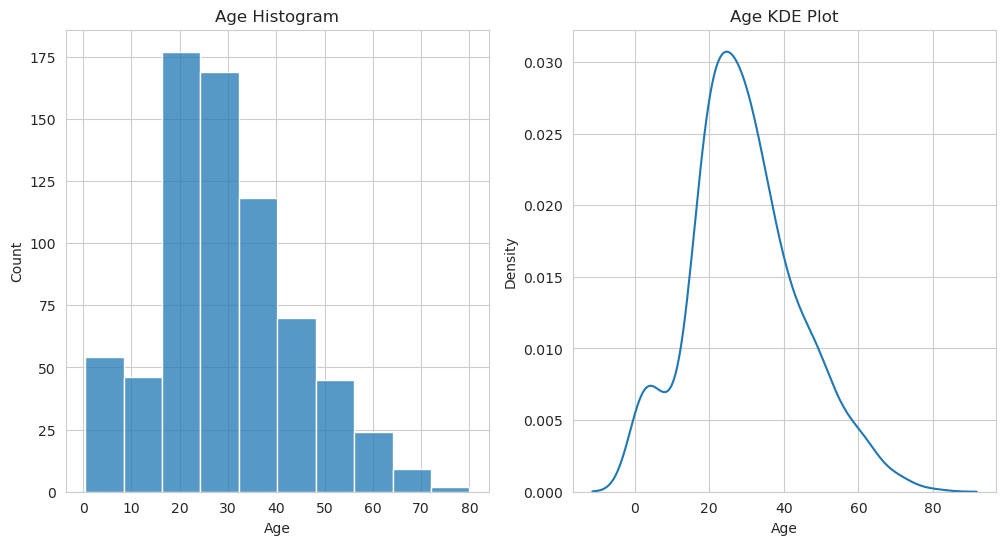

In [379]:
fig,ax = plt.subplots(figsize=(12,6),ncols=2)
sns.histplot(ax=ax[0],x='Age',data=df,bins=10)
sns.kdeplot(ax=ax[1],x='Age', data=df)

ax[0].set_title('Age Histogram')
ax[1].set_title('Age KDE Plot')

**Age in relation to Survival**

In [380]:
# grouping Age in to differnt categories
def age_group(x):
    if (x <= 1):
        return "Infants"
    elif ((x >1) and (x<=12)):
        return "Children"
    elif (x>12 and x<=17):
        return "Teenagers"
    elif (x>17 and x<=35):
        return "Young Adults"
    elif(x>35 and x<=65):
        return "Middle Aged"
    elif (x>65):
        return "Elderly"


In [381]:
df.Age.apply(age_group).value_counts()

Young Adults    384
Middle Aged     209
Children         55
Teenagers        44
Infants          14
Elderly           8
Name: Age, dtype: int64

In [382]:
df["AgeGroup"] = df.Age.apply(age_group)

In [383]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


In [384]:
SurvivedByAgeGroup = (df.groupby("Survived")["AgeGroup"].value_counts()/df.groupby("Survived")["AgeGroup"].count())*100
SurvivedByAgeGroup

Survived  AgeGroup    
0         Young Adults   56.132
          Middle Aged    29.953
          Children        6.368
          Teenagers       5.425
          Elderly         1.651
          Infants         0.472
1         Young Adults   50.345
          Middle Aged    28.276
          Children        9.655
          Teenagers       7.241
          Infants         4.138
          Elderly         0.345
Name: AgeGroup, dtype: float64

In [385]:
SurvivedByAgeGroup=SurvivedByAgeGroup.reset_index(name='pct')
SurvivedByAgeGroup

,Survived,AgeGroup,pct
0,0,Young Adults,56.132
1,0,Middle Aged,29.953
2,0,Children,6.368
3,0,Teenagers,5.425
4,0,Elderly,1.651
5,0,Infants,0.472
6,1,Young Adults,50.345
7,1,Middle Aged,28.276
8,1,Children,9.655
9,1,Teenagers,7.241


In [386]:
SurvivedByAgeGroup.Survived=SurvivedByAgeGroup.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByAgeGroup.sort_values(by=["Survived","pct"],inplace=True)
SurvivedByAgeGroup

,Survived,AgeGroup,pct
5,Not Survived,Infants,0.472
4,Not Survived,Elderly,1.651
3,Not Survived,Teenagers,5.425
2,Not Survived,Children,6.368
1,Not Survived,Middle Aged,29.953
0,Not Survived,Young Adults,56.132
11,Surived,Elderly,0.345
10,Surived,Infants,4.138
9,Surived,Teenagers,7.241
8,Surived,Children,9.655


Text(0.5, 1.0, 'Survival Percentage by Age Group')

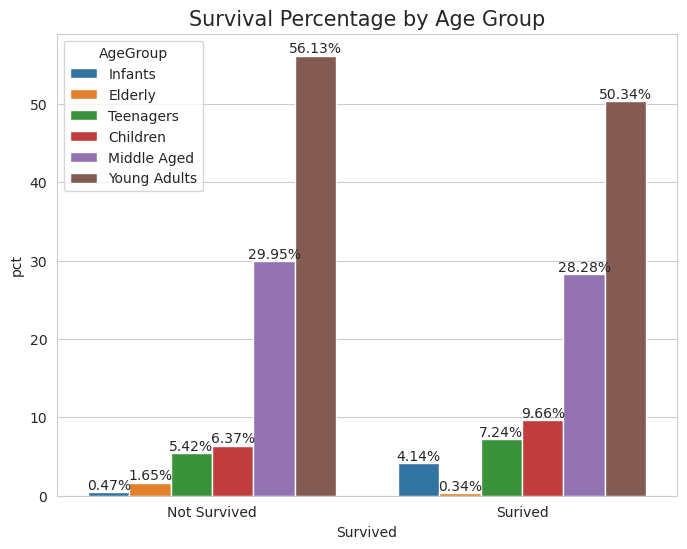

In [387]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Survived",y="pct",data=SurvivedByAgeGroup,hue="AgeGroup")

ax.set_xticklabels(SurvivedByAgeGroup.Survived.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Age Group',fontsize=15)


In [388]:
SurvivedByAgeGroup = (df.groupby("AgeGroup")["Survived"].value_counts()/df.groupby("AgeGroup")["Survived"].count())*100
SurvivedByAgeGroup=SurvivedByAgeGroup.reset_index(name='pct')
SurvivedByAgeGroup.Survived=SurvivedByAgeGroup.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByAgeGroup.sort_values(by=["Survived","pct"],inplace=True)
SurvivedByAgeGroup

,AgeGroup,Survived,pct
5,Infants,Not Survived,14.286
1,Children,Not Survived,49.091
8,Teenagers,Not Survived,52.273
6,Middle Aged,Not Survived,60.766
10,Young Adults,Not Survived,61.979
2,Elderly,Not Survived,87.500
3,Elderly,Surived,12.500
11,Young Adults,Surived,38.021
7,Middle Aged,Surived,39.234
9,Teenagers,Surived,47.727


Text(0.5, 1.0, 'Survival Percentage by Age Group')

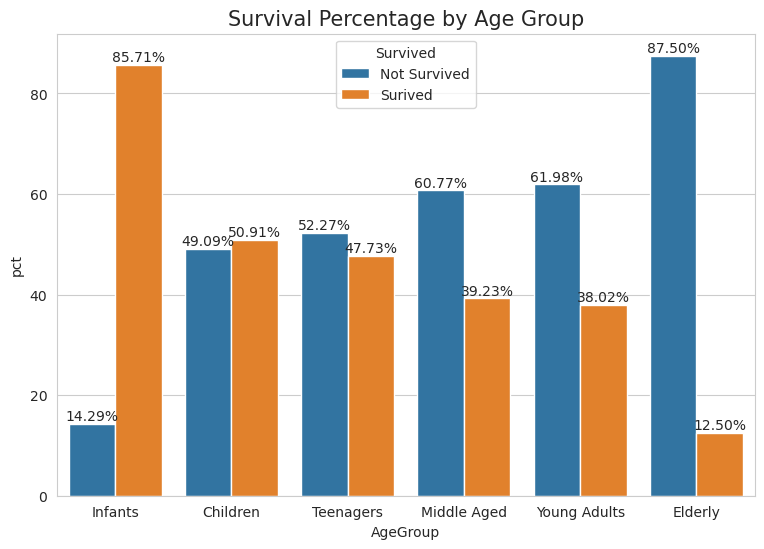

In [389]:
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="AgeGroup",y="pct",data=SurvivedByAgeGroup,hue="Survived")

ax.set_xticklabels(SurvivedByAgeGroup.AgeGroup.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Age Group',fontsize=15)

# Conclusion

**More Young Adults (17 to 35) and Middle aged (35 to 65) survived the accident , with in self more Infants and Children survived than others**

# Pclass

In [390]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


In [391]:
class_pct=df.Pclass.value_counts()/len(df)*100 # More 3rd class passengers than 1st and  2nd class combined
class_pct.sort_index(inplace=True)
class_pct

1   24.242
2   20.651
3   55.107
Name: Pclass, dtype: float64

Text(0.5, 1.0, 'Pecentage of Passenger Classes - Titanic')

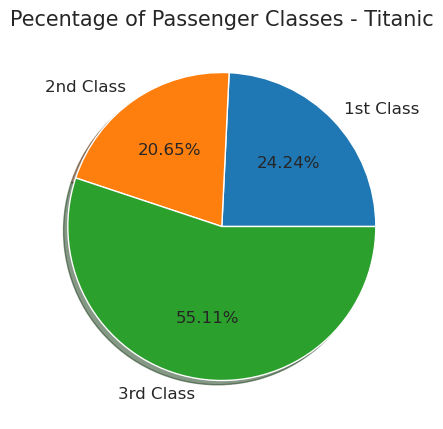

In [392]:
fig,ax = plt.subplots(figsize=(7,5))
ax.pie(x=class_pct,
       labels=["1st Class","2nd Class","3rd Class"],
       autopct='%.2f%%',
       shadow=True,
      # explode=[0,0.05,0.05],
      textprops=({'size': 'large'}))
ax.set_title('Pecentage of Passenger Classes - Titanic',fontsize=15)

**Passenger Class in relation to Survival**

In [393]:
SurvivedByPclass = (df.groupby("Survived")["Pclass"].value_counts()/df.groupby("Survived")["Pclass"].count())*100
SurvivedByPclass=SurvivedByPclass.reset_index(name='pct')
SurvivedByPclass.Survived=SurvivedByPclass.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByPclass.Pclass=SurvivedByPclass.Pclass.replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})
SurvivedByPclass.sort_values(by=["Survived","pct"],inplace=True)
SurvivedByPclass

,Survived,Pclass,pct
2,Not Survived,1st Class,14.572
1,Not Survived,2nd Class,17.668
0,Not Survived,3rd Class,67.760
5,Surived,2nd Class,25.439
4,Surived,3rd Class,34.795
3,Surived,1st Class,39.766


Text(0.5, 1.0, 'Survival Percentage by Passenger Class')

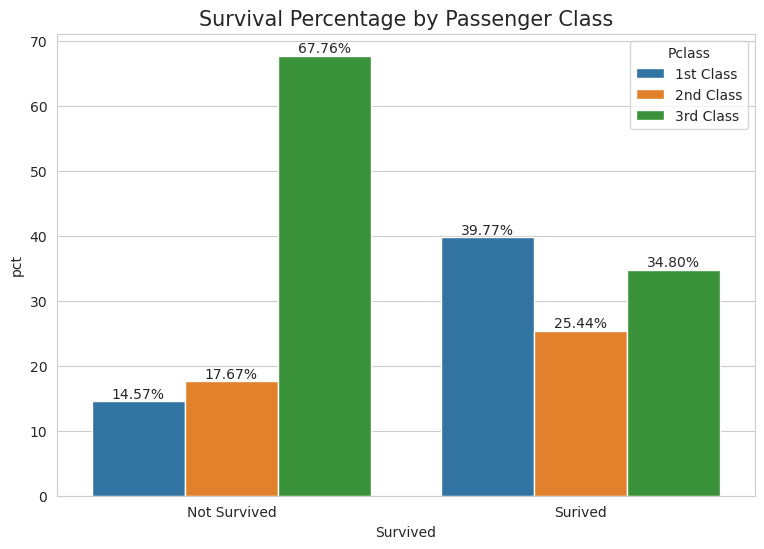

In [394]:
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="Survived",y="pct",data=SurvivedByPclass,hue="Pclass")

ax.set_xticklabels(SurvivedByPclass.Survived.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Passenger Class',fontsize=15)

In [395]:
SurvivedByPclass = (df.groupby("Pclass")["Survived"].value_counts()/df.groupby("Pclass")["Survived"].count())*100
SurvivedByPclass=SurvivedByPclass.reset_index(name='pct')
SurvivedByPclass.Survived=SurvivedByPclass.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByPclass.Pclass=SurvivedByPclass.Pclass.replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})
SurvivedByPclass.sort_values(by=["Survived","pct"],inplace=True)
SurvivedByPclass

,Pclass,Survived,pct
1,1st Class,Not Survived,37.037
2,2nd Class,Not Survived,52.717
4,3rd Class,Not Survived,75.764
5,3rd Class,Surived,24.236
3,2nd Class,Surived,47.283
0,1st Class,Surived,62.963


Text(0.5, 1.0, 'Survival Percentage by Passenger Class')

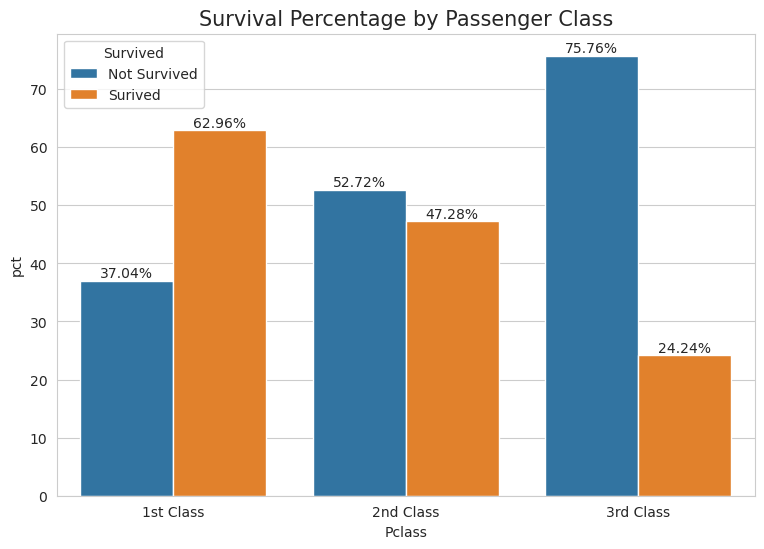

In [396]:
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="Pclass",y="pct",data=SurvivedByPclass,hue="Survived")

ax.set_xticklabels(SurvivedByPclass.Pclass.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Passenger Class',fontsize=15)

# Conclusion

More 1st class passengers survived the accident followed by 3rd class and with in self as well higher percentage of 1st class passengers survived the accident followed by 2nd class

In [397]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


# Embarked

S - Southampton

C - Cherbourg 

Q - Queenstown

In [398]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

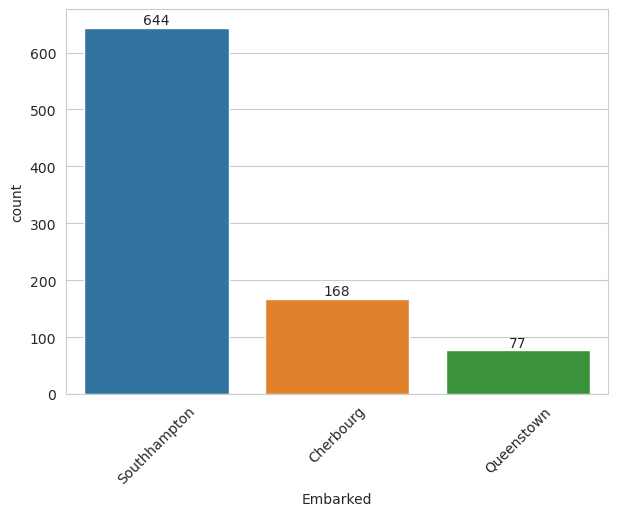

In [399]:
fig,ax = plt.subplots(figsize=(7,5))
sns.countplot(x="Embarked",data=df)
ax.set_xticklabels(["Southhampton","Cherbourg","Queenstown"],rotation=45);

for i in ax.containers:
    ax.bar_label(i)

**Embarked in relation with Survival**

In [400]:
SurvivedByEmbark = (df.groupby("Survived")["Embarked"].value_counts()/df.groupby("Survived")["Embarked"].count())*100
SurvivedByEmbark=SurvivedByEmbark.reset_index(name='pct')
SurvivedByEmbark.Survived=SurvivedByEmbark.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByEmbark.Embarked=SurvivedByEmbark.Embarked.replace({'S':'Southhampton','C':'Cherbourg','Q':'Queenstown'})
SurvivedByEmbark.sort_values(by=["Survived","Embarked"],inplace=True)
SurvivedByEmbark

,Survived,Embarked,pct
1,Not Survived,Cherbourg,13.661
2,Not Survived,Queenstown,8.561
0,Not Survived,Southhampton,77.778
4,Surived,Cherbourg,27.353
5,Surived,Queenstown,8.824
3,Surived,Southhampton,63.824


Text(0.5, 1.0, 'Survival Percentage by Embarked')

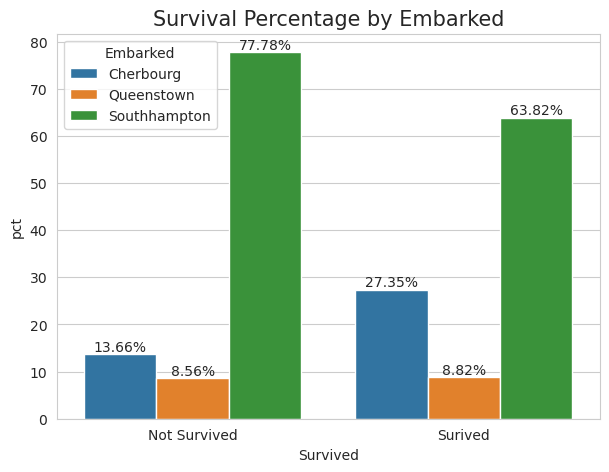

In [401]:
fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x="Survived",y="pct",data=SurvivedByEmbark,hue="Embarked")

ax.set_xticklabels(SurvivedByEmbark.Survived.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Embarked',fontsize=15)

In [402]:
SurvivedByEmbark = (df.groupby("Embarked")["Survived"].value_counts()/df.groupby("Embarked")["Survived"].count())*100
SurvivedByEmbark=SurvivedByEmbark.reset_index(name='pct')
SurvivedByEmbark.Survived=SurvivedByEmbark.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByEmbark.Embarked=SurvivedByEmbark.Embarked.replace({'S':'Southhampton','C':'Cherbourg','Q':'Queenstown'})
SurvivedByEmbark.sort_values(by=["Survived","Embarked"],inplace=True)
SurvivedByEmbark

,Embarked,Survived,pct
1,Cherbourg,Not Survived,44.643
2,Queenstown,Not Survived,61.039
4,Southhampton,Not Survived,66.304
0,Cherbourg,Surived,55.357
3,Queenstown,Surived,38.961
5,Southhampton,Surived,33.696


Text(0.5, 1.0, 'Survival Percentage by Embarked')

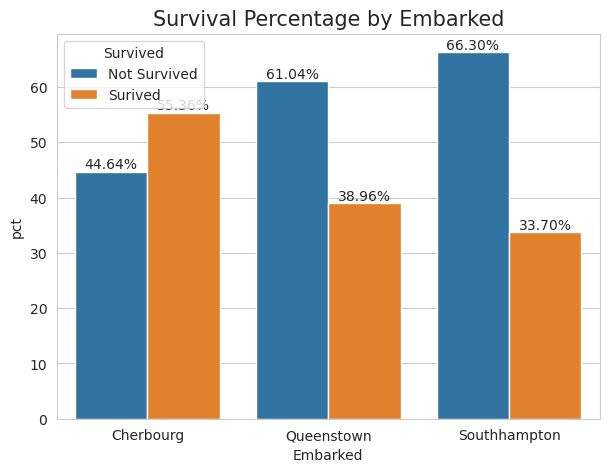

In [403]:
fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x="Embarked",y="pct",data=SurvivedByEmbark,hue="Survived")

ax.set_xticklabels(SurvivedByEmbark.Embarked.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Embarked',fontsize=15)

Embarked in relation with Passenger Class

In [404]:
(df.groupby("Embarked")["Pclass"].value_counts()/df.groupby("Embarked")["Pclass"].count())*100

Embarked  Pclass
C         1        50.595
          3        39.286
          2        10.119
Q         3        93.506
          2         3.896
          1         2.597
S         3        54.814
          2        25.466
          1        19.720
Name: Pclass, dtype: float64

# Conclusion

More passengers mounted from Southhampton survived the accident, with in self more percentage of people mounted at Chebourg survived the accident more than other mounted places

Higher percentage of passengers Embarked in Queenstown are 3rd calss than 1st and 2nd classes, when compare to other mounting places Chebourg and Southhampton, which says Queenstown have higher number of low income families

# Fare

In [405]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


In [406]:
df.Fare.describe()

count   891.000
mean     32.204
std      49.693
min       0.000
25%       7.910
50%      14.454
75%      31.000
max     512.329
Name: Fare, dtype: float64

In [407]:
df.loc[df.Pclass==3].Fare.describe()

count   491.000
mean     13.676
std      11.778
min       0.000
25%       7.750
50%       8.050
75%      15.500
max      69.550
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

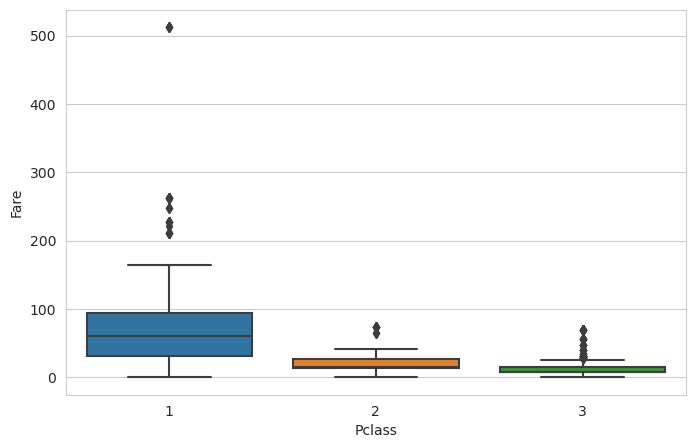

In [408]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass",y="Fare",data=df)

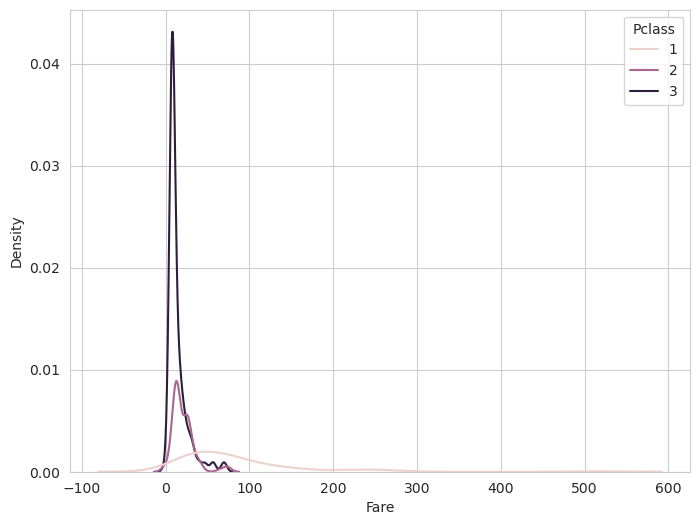

In [409]:
plt.figure(figsize=(8,6))

sns.kdeplot(x="Fare",hue="Pclass",data=df);

# Conclusion

**Higher the Fare, higher the Class(1st class is considred higher/upper calss), 1st class fares are much more expensive with wider ranges than 2nd and 3rd classes**

# SibSp  -- Number of siblings or spouse of a person onboard

In [410]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


In [411]:
sibsp_pct=(df.SibSp.value_counts()/len(df))*100
sibsp_pct=sibsp_pct.reset_index(name="pct")
sibsp_pct=sibsp_pct.rename(columns={"index":"SibSp"})
sibsp_pct

,SibSp,pct
0,0,68.238
1,1,23.457
2,2,3.143
3,4,2.020
4,3,1.796
5,8,0.786
6,5,0.561


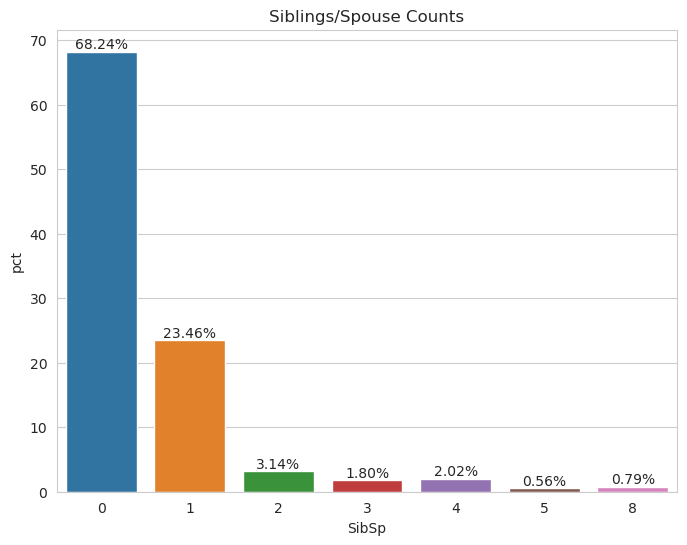

In [412]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x="SibSp",y="pct",data=sibsp_pct)

ax.set_title("Siblings/Spouse Counts")

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f%%')

In [415]:
df.groupby("Pclass")["SibSp"].value_counts()/df.groupby("Pclass")["SibSp"].count()

Pclass  SibSp
1       0       0.634
        1       0.329
        2       0.023
        3       0.014
2       0       0.652
        1       0.299
        2       0.043
        3       0.005
3       0       0.715
        1       0.169
        4       0.037
        2       0.031
        3       0.024
        8       0.014
        5       0.010
Name: SibSp, dtype: float64

In [418]:
ClassBySibSp = (df.groupby("Pclass")["SibSp"].value_counts()/df.groupby("Pclass")["SibSp"].count())*100
ClassBySibSp=ClassBySibSp.reset_index(name='pct')
ClassBySibSp.Pclass=ClassBySibSp.Pclass.replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})
ClassBySibSp.sort_values(by=["Pclass","SibSp"],inplace=True)
ClassBySibSp

,Pclass,SibSp,pct
0,1st Class,0,63.426
1,1st Class,1,32.870
2,1st Class,2,2.315
3,1st Class,3,1.389
4,2nd Class,0,65.217
5,2nd Class,1,29.891
6,2nd Class,2,4.348
7,2nd Class,3,0.543
8,3rd Class,0,71.487
9,3rd Class,1,16.904


Text(0.5, 1.0, 'Passenger Class Percentage by SibSp')

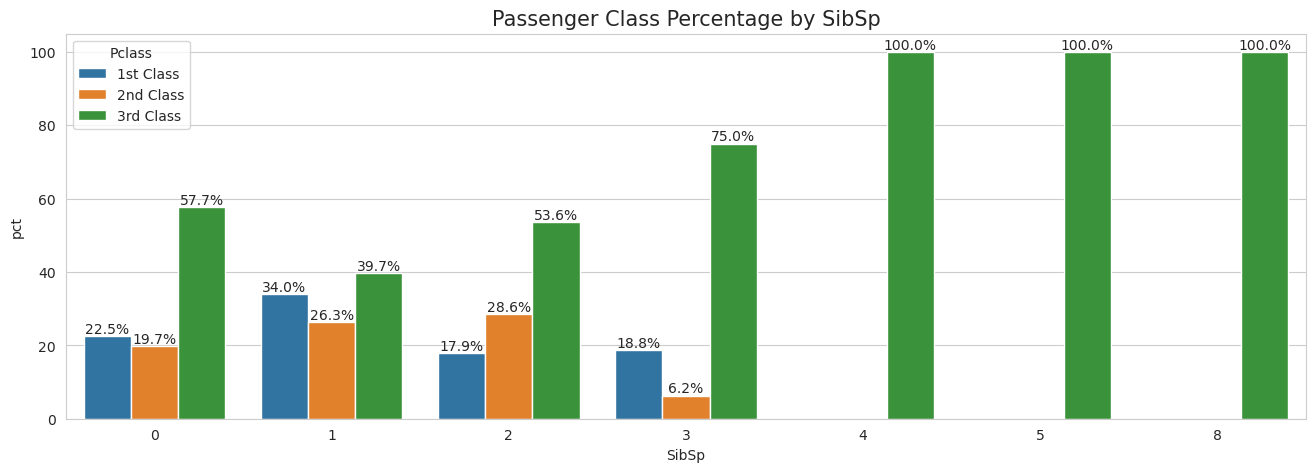

In [425]:
fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x="SibSp",y="pct",data=ClassBySibSp,hue="Pclass")

ax.set_xticklabels(ClassBySibSp.SibSp.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.1f%%")
    
ax.set_title('Passenger Class Percentage by SibSp',fontsize=15)

In [416]:
df.groupby("SibSp")["Pclass"].value_counts()/df.groupby("SibSp")["Pclass"].count()

SibSp  Pclass
0      3        0.577
       1        0.225
       2        0.197
1      3        0.397
       1        0.340
       2        0.263
2      3        0.536
       2        0.286
       1        0.179
3      3        0.750
       1        0.188
       2        0.062
4      3        1.000
5      3        1.000
8      3        1.000
Name: Pclass, dtype: float64

In [419]:
ClassBySibSp = (df.groupby("SibSp")["Pclass"].value_counts()/df.groupby("SibSp")["Pclass"].count())*100
ClassBySibSp=ClassBySibSp.reset_index(name='pct')
ClassBySibSp.Pclass=ClassBySibSp.Pclass.replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})
ClassBySibSp.sort_values(by=["Pclass","SibSp"],inplace=True)
ClassBySibSp

,SibSp,Pclass,pct
1,0,1st Class,22.533
4,1,1st Class,33.971
8,2,1st Class,17.857
10,3,1st Class,18.750
2,0,2nd Class,19.737
5,1,2nd Class,26.316
7,2,2nd Class,28.571
11,3,2nd Class,6.250
0,0,3rd Class,57.730
3,1,3rd Class,39.713


Text(0.5, 1.0, 'Passenger Class Percentage by SibSp')

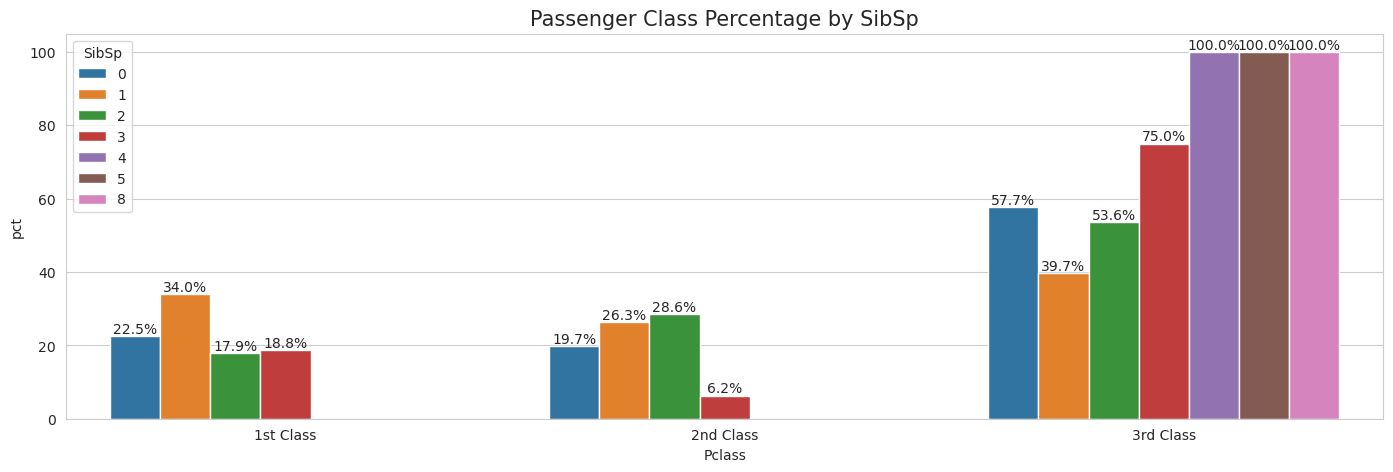

In [429]:
fig,ax = plt.subplots(figsize=(17,5))
sns.barplot(x="Pclass",y="pct",data=ClassBySibSp,hue="SibSp")

ax.set_xticklabels(ClassBySibSp.Pclass.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.1f%%")
    
ax.set_title('Passenger Class Percentage by SibSp',fontsize=15)

# Conclusion

**3rd class passengers travelled with more Siblings and Spouses (more family members) than 1st and 2nd class passengers**

# Cabin

In [430]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Young Adults


In [431]:
df.Cabin.str.get(0).value_counts(dropna=False).sort_index()

A       15
B       47
C       59
D       33
E       32
F       13
G        4
T        1
NaN    687
Name: Cabin, dtype: int64

In [432]:
df.dropna(inplace=True)
df.Cabin.str.get(0).value_counts(dropna=False).sort_index()

A    12
B    43
C    51
D    31
E    30
F    11
G     4
T     1
Name: Cabin, dtype: int64

In [433]:
df["CabinType"]=df.Cabin.str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinType
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S,Middle Aged,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S,Children,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S,Middle Aged,C


In [434]:
cabin_cnt=df.CabinType.value_counts(dropna=False).sort_index()
cabin_cnt=cabin_cnt.reset_index(name='cnt')
cabin_cnt=cabin_cnt.rename(columns={"index":"CabinType"})
cabin_cnt

,CabinType,cnt
0,A,12
1,B,43
2,C,51
3,D,31
4,E,30
5,F,11
6,G,4
7,T,1


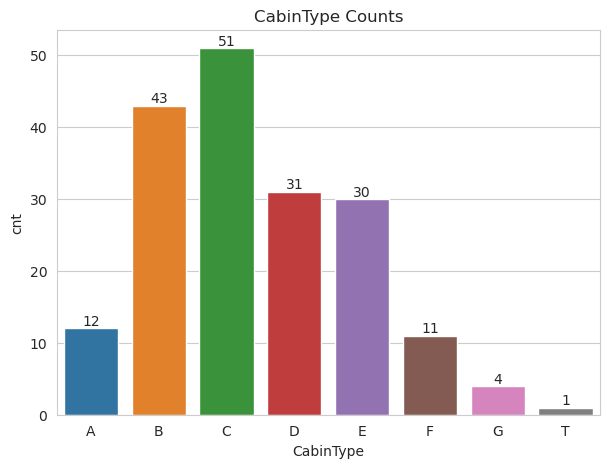

In [435]:
fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x="CabinType",y="cnt",data=cabin_cnt)

ax.set_title("CabinType Counts")

for i in ax.containers:
    ax.bar_label(i)

In [436]:
SurvivedByCabin = (df.groupby("Survived")["CabinType"].value_counts()/df.groupby("Survived")["CabinType"].count())*100
SurvivedByCabin=SurvivedByCabin.reset_index(name='pct')
SurvivedByCabin.Survived=SurvivedByCabin.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByCabin.sort_values(by=["Survived","CabinType"],inplace=True)
SurvivedByCabin

,Survived,CabinType,pct
4,Not Survived,A,8.333
1,Not Survived,B,18.333
0,Not Survived,C,35.000
2,Not Survived,D,13.333
3,Not Survived,E,13.333
5,Not Survived,F,6.667
6,Not Survived,G,3.333
7,Not Survived,T,1.667
12,Surived,A,5.691
8,Surived,B,26.016


Text(0.5, 1.0, 'Survival Percentage by Embarked')

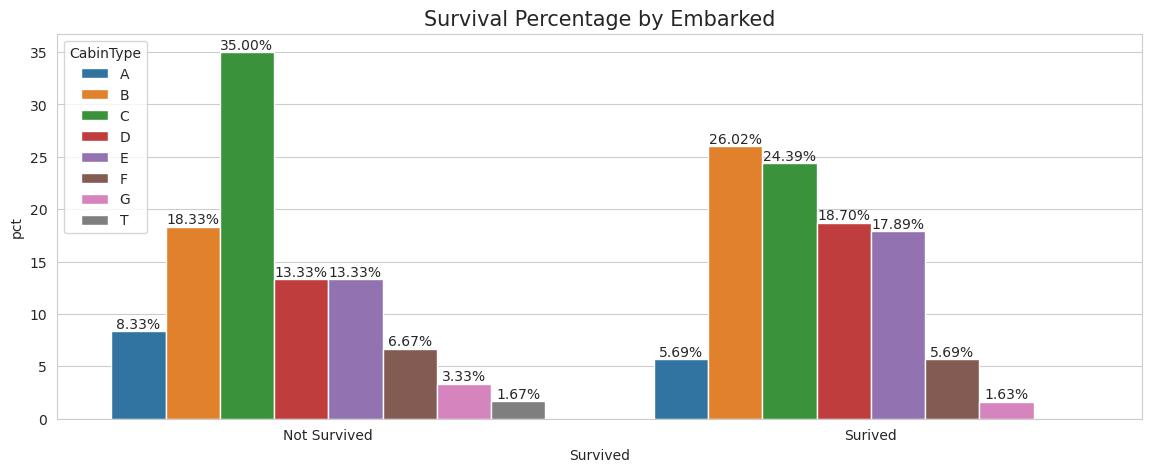

In [437]:
fig,ax = plt.subplots(figsize=(14,5))
sns.barplot(x="Survived",y="pct",data=SurvivedByCabin,hue="CabinType")

ax.set_xticklabels(SurvivedByCabin.Survived.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Embarked',fontsize=15)

In [438]:
SurvivedByCabin = (df.groupby("CabinType")["Survived"].value_counts()/df.groupby("CabinType")["Survived"].count())*100
SurvivedByCabin=SurvivedByCabin.reset_index(name='pct')
SurvivedByCabin.Survived=SurvivedByCabin.Survived.replace({1:'Surived',0:'Not Survived'})
SurvivedByCabin.sort_values(by=["Survived","CabinType"],inplace=True)
SurvivedByCabin

,CabinType,Survived,pct
1,A,Not Survived,41.667
3,B,Not Survived,25.581
5,C,Not Survived,41.176
7,D,Not Survived,25.806
9,E,Not Survived,26.667
11,F,Not Survived,36.364
12,G,Not Survived,50.000
14,T,Not Survived,100.000
0,A,Surived,58.333
2,B,Surived,74.419


Text(0.5, 1.0, 'Survival Percentage by Embarked')

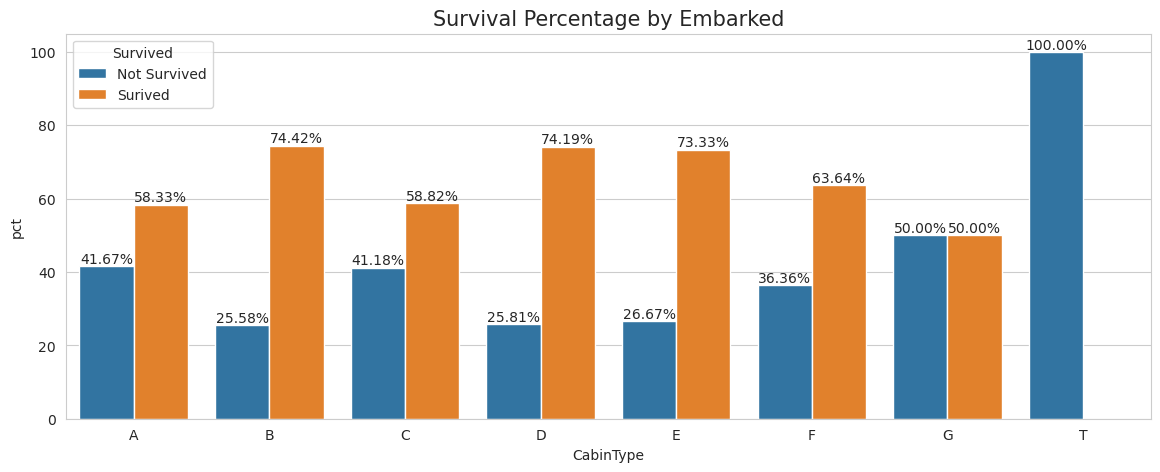

In [439]:
fig,ax = plt.subplots(figsize=(14,5))
sns.barplot(x="CabinType",y="pct",data=SurvivedByCabin,hue="Survived")

ax.set_xticklabels(SurvivedByCabin.CabinType.unique())

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")
    
ax.set_title('Survival Percentage by Embarked',fontsize=15)

# Conclusion

**Cabins are grouped by the starting letter A,B,C...etc., overall more passengers from Cabins B and C survived most and with in self, Cabins B, D , E survival rate is higher**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

In [440]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinType
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Middle Aged,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Young Adults,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S,Middle Aged,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S,Children,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S,Middle Aged,C


In [443]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [444]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinType
1,1,1,female,38.000,1,0,71.283,C,Middle Aged,C
3,1,1,female,35.000,1,0,53.100,S,Young Adults,C
6,0,1,male,54.000,0,0,51.862,S,Middle Aged,E
10,1,3,female,4.000,1,1,16.700,S,Children,G
11,1,1,female,58.000,0,0,26.550,S,Middle Aged,C


In [445]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
AgeGroup     0
CabinType    0
dtype: int64

In [446]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,183.000,0.672,0.471,0.000,0.000,1.000,1.000,1.000
Pclass,183.000,1.191,0.515,1.000,1.000,1.000,1.000,3.000
Age,183.000,35.674,15.644,0.920,24.000,36.000,47.500,80.000
SibSp,183.000,0.464,0.644,0.000,0.000,0.000,1.000,3.000
Parch,183.000,0.475,0.755,0.000,0.000,0.000,1.000,4.000
Fare,183.000,78.682,76.348,0.000,29.700,57.000,90.000,512.329


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   183 non-null    int64  
 1   Pclass     183 non-null    int64  
 2   Sex        183 non-null    object 
 3   Age        183 non-null    float64
 4   SibSp      183 non-null    int64  
 5   Parch      183 non-null    int64  
 6   Fare       183 non-null    float64
 7   Embarked   183 non-null    object 
 8   AgeGroup   183 non-null    object 
 9   CabinType  183 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 15.7+ KB


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

**Target Feature Survired is already Numeric**

### 1. Convert all features to numeric

In [448]:
conv=pd.get_dummies(df,drop_first=True)
conv.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Elderly,AgeGroup_Infants,AgeGroup_Middle Aged,AgeGroup_Teenagers,AgeGroup_Young Adults,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_T
1,1,1,38.000,1,0,71.283,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,1,35.000,1,0,53.100,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
6,0,1,54.000,0,0,51.862,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
10,1,3,4.000,1,1,16.700,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11,1,1,58.000,0,0,26.550,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [449]:
df.shape

(183, 10)

In [450]:
pd.get_dummies(df,drop_first=True).shape

(183, 21)

### 2. Take a look at correlation between features by utilizing power of visualizing

In [451]:
df_corr =conv.corr()
df_corr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Elderly,AgeGroup_Infants,AgeGroup_Middle Aged,AgeGroup_Teenagers,AgeGroup_Young Adults,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_T
Survived,1.000,-0.035,-0.254,0.106,0.024,0.134,-0.532,-0.039,-0.096,-0.093,0.073,-0.221,0.149,0.150,0.085,-0.111,0.067,0.058,-0.019,-0.055,-0.106
Pclass,-0.035,1.000,-0.307,-0.104,0.047,-0.315,-0.046,-0.039,0.239,-0.048,0.063,-0.239,-0.080,0.118,-0.206,-0.231,-0.055,0.094,0.532,0.526,-0.028
Age,-0.254,-0.307,1.000,-0.156,-0.271,-0.092,0.185,0.019,-0.089,0.314,-0.234,0.722,-0.270,-0.456,-0.050,0.016,0.097,0.069,-0.255,-0.200,0.044
SibSp,0.106,-0.104,-0.156,1.000,0.255,0.286,-0.104,0.169,0.020,-0.026,0.169,-0.065,-0.030,0.000,-0.080,0.234,-0.032,-0.090,0.032,0.008,-0.054
Parch,0.024,0.047,-0.271,0.255,1.000,0.390,-0.090,-0.066,0.088,-0.024,0.143,-0.128,0.114,-0.056,0.112,0.061,-0.092,-0.103,0.024,0.154,-0.047


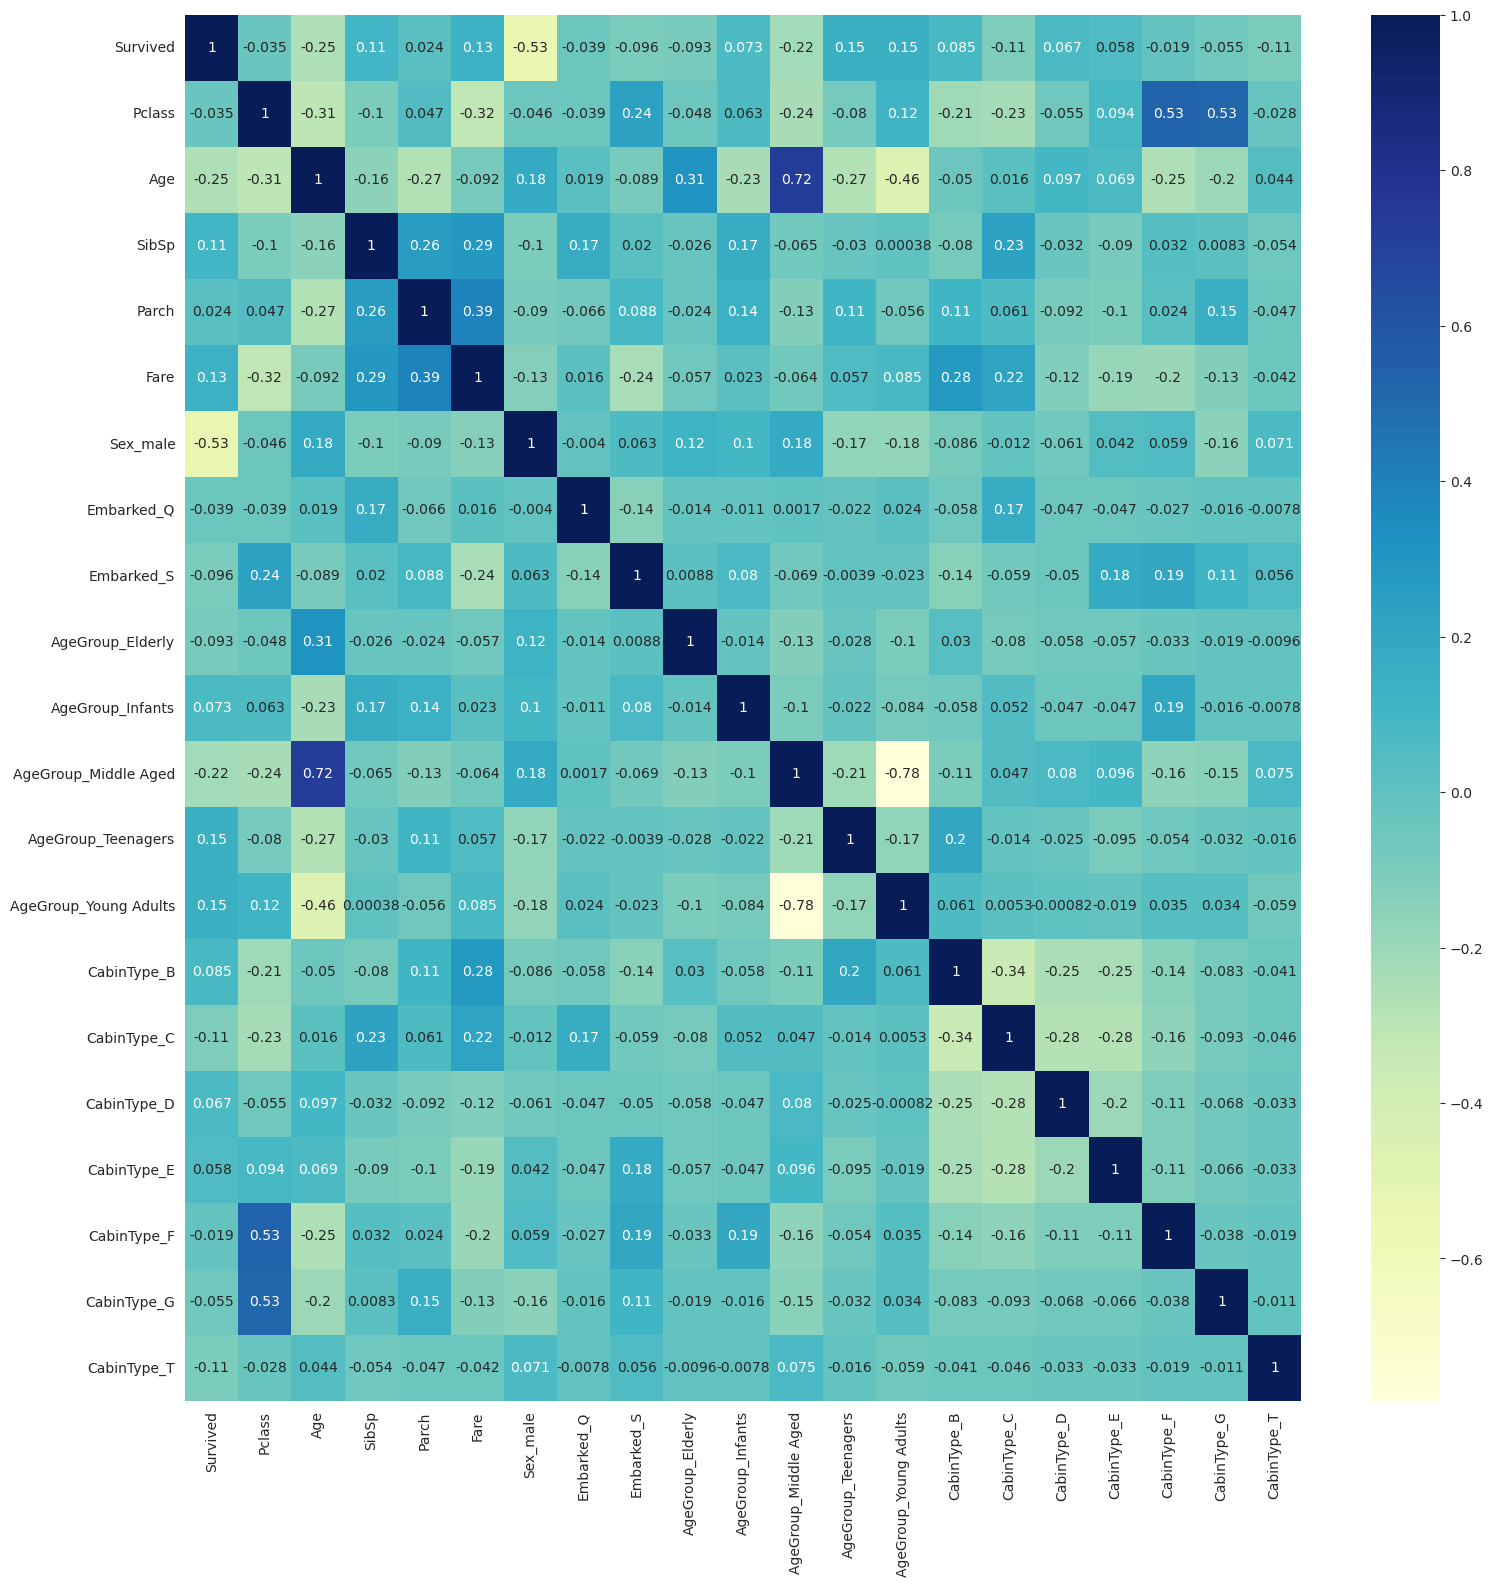

In [452]:
fig,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_corr,annot=True,cmap="YlGnBu");

In [453]:
df_corr_survived = df_corr[["Survived"]].sort_values("Survived",ascending=False)[1::]
df_corr_survived

,Survived
AgeGroup_Young Adults,0.150
AgeGroup_Teenagers,0.149
Fare,0.134
SibSp,0.106
CabinType_B,0.085
AgeGroup_Infants,0.073
CabinType_D,0.067
CabinType_E,0.058
Parch,0.024
CabinType_F,-0.019


In [454]:
df_corr_survived.values

array([[ 0.14998702],
       [ 0.14933068],
       [ 0.13424105],
       [ 0.10634623],
       [ 0.08506612],
       [ 0.07341736],
       [ 0.06715284],
       [ 0.05773042],
       [ 0.02358241],
       [-0.01926832],
       [-0.03454219],
       [-0.03854412],
       [-0.05481329],
       [-0.09317253],
       [-0.09586102],
       [-0.10613075],
       [-0.11108656],
       [-0.22100847],
       [-0.25408475],
       [-0.53241797]])

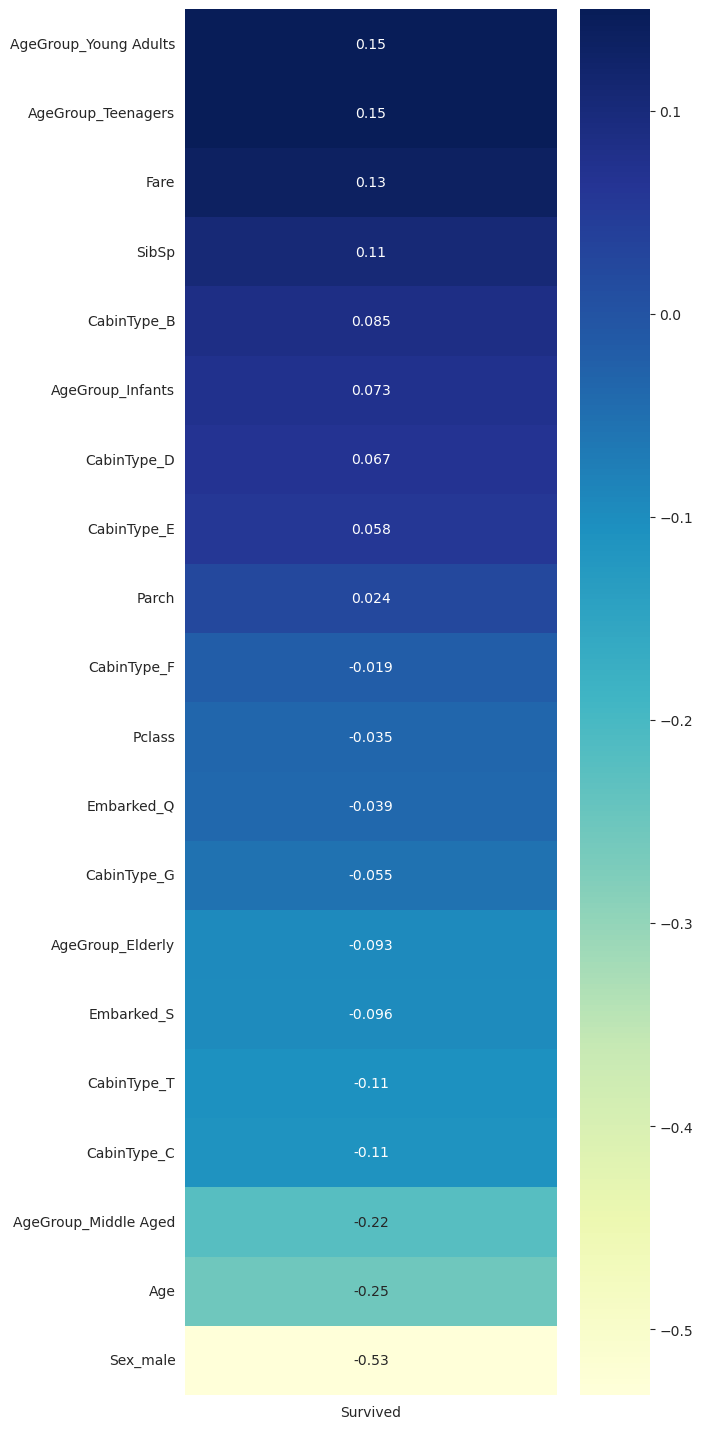

In [455]:
fig,ax=plt.subplots(figsize=(6,18))
sns.heatmap(df_corr_survived,annot=True,cmap="YlGnBu");

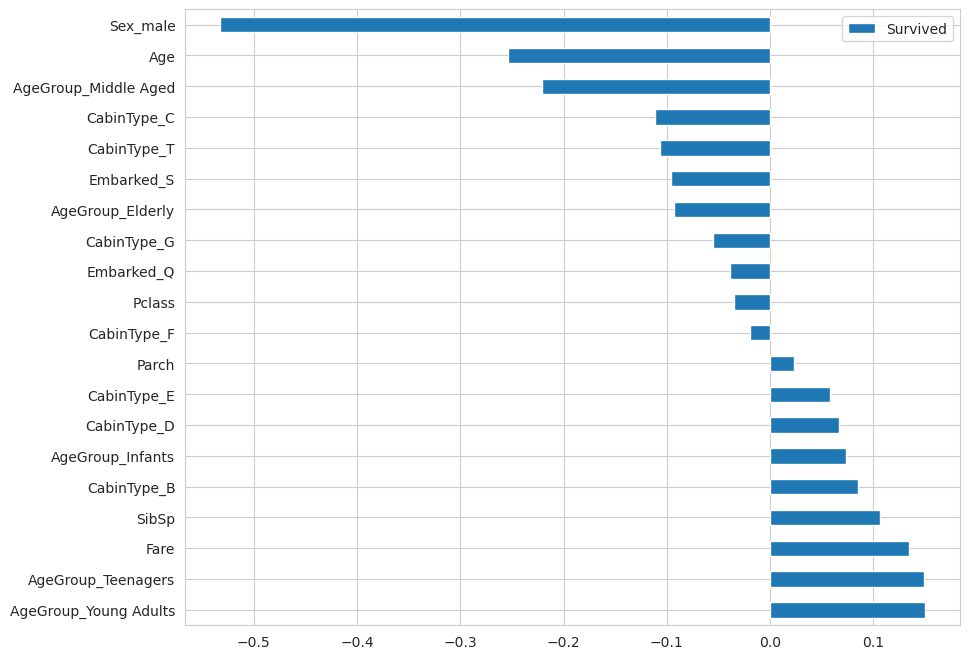

In [456]:
df_corr_survived.plot.barh();

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover"></a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of Titanic EDA</p>